In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
titanic_df_og = pd.read_csv(r'train_test_data\train.csv')
titanic_df = titanic_df_og.copy() #copy of the original data
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

* The data is imbalanced

In [6]:
titanic_df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [7]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [8]:
titanic_df['SibSp'].value_counts() #siblins / spouse

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [9]:
titanic_df['Parch'].value_counts() # parents

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [10]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [11]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
titanic_df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [13]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [14]:
Y = titanic_df['Survived']
titanic_df = titanic_df.drop(['PassengerId','Survived','Cabin','Name'],axis=1)
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,female,35.0,1,0,113803,53.1000,S
4,3,male,35.0,0,0,373450,8.0500,S


In [15]:
le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])

In [16]:
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,A/5 21171,7.2500,S
1,1,0,38.0,1,0,PC 17599,71.2833,C
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,0,35.0,1,0,113803,53.1000,S
4,3,1,35.0,0,0,373450,8.0500,S


In [17]:
onehot = OneHotEncoder()

encode_array = onehot.fit_transform(titanic_df[['Embarked']]).toarray()
encode_array

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [18]:
Embarked_df = pd.DataFrame(data = encode_array,columns = onehot.get_feature_names_out(['Embarked']))

In [19]:
Embarked_df

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,1.0
887,0.0,0.0,1.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [20]:
titanic_df = pd.concat([titanic_df,Embarked_df],axis=1)
titanic_df = titanic_df.drop('Embarked',axis=1)
titanic_df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0
1,1,0,38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0
3,1,0,35.0,1,0,113803,53.1000,0.0,0.0,1.0
4,3,1,35.0,0,0,373450,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,211536,13.0000,0.0,0.0,1.0
887,1,0,19.0,0,0,112053,30.0000,0.0,0.0,1.0
888,3,0,28.0,1,2,W./C. 6607,23.4500,0.0,0.0,1.0
889,1,1,26.0,0,0,111369,30.0000,1.0,0.0,0.0


In [21]:
titanic_df['Ticket_numeric_1'] = pd.to_numeric(titanic_df['Ticket'],errors='coerce')
titanic_df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Ticket_numeric_1
0,3,1,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0,NaN
1,1,0,38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0,NaN
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,NaN
3,1,0,35.0,1,0,113803,53.1000,0.0,0.0,1.0,113803.0
4,3,1,35.0,0,0,373450,8.0500,0.0,0.0,1.0,373450.0
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,211536,13.0000,0.0,0.0,1.0,211536.0
887,1,0,19.0,0,0,112053,30.0000,0.0,0.0,1.0,112053.0
888,3,0,28.0,1,2,W./C. 6607,23.4500,0.0,0.0,1.0,NaN
889,1,1,26.0,0,0,111369,30.0000,1.0,0.0,0.0,111369.0


In [22]:
titanic_df['Ticket_2_str'] = titanic_df['Ticket'].where(titanic_df['Ticket_numeric_1'].isna())
titanic_df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Ticket_numeric_1,Ticket_2_str
0,3,1,22.0,1,0,A/5 21171,7.2500,0.0,0.0,1.0,NaN,A/5 21171
1,1,0,38.0,1,0,PC 17599,71.2833,1.0,0.0,0.0,NaN,PC 17599
2,3,0,26.0,0,0,STON/O2. 3101282,7.9250,0.0,0.0,1.0,NaN,STON/O2. 3101282
3,1,0,35.0,1,0,113803,53.1000,0.0,0.0,1.0,113803.0,NaN
4,3,1,35.0,0,0,373450,8.0500,0.0,0.0,1.0,373450.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,211536,13.0000,0.0,0.0,1.0,211536.0,NaN
887,1,0,19.0,0,0,112053,30.0000,0.0,0.0,1.0,112053.0,NaN
888,3,0,28.0,1,2,W./C. 6607,23.4500,0.0,0.0,1.0,NaN,W./C. 6607
889,1,1,26.0,0,0,111369,30.0000,1.0,0.0,0.0,111369.0,NaN


In [23]:
titanic_df['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [24]:
titanic_df = titanic_df.drop('Ticket',axis=1) # droping Ticket column
titanic_df['Ticket_2_str'].value_counts()

Ticket_2_str
CA. 2343            7
CA 2144             6
S.O.C. 14879        5
LINE                4
PC 17757            4
                   ..
PC 17592            1
SC/PARIS 2149       1
PC 17590            1
C.A./SOTON 34068    1
SOTON/OQ 392076     1
Name: count, Length: 167, dtype: int64

In [25]:
titanic_df['Ticket_numeric_1'].value_counts()

Ticket_numeric_1
1601.0       7
347082.0     7
3101295.0    6
347088.0     6
382652.0     5
            ..
248706.0     1
350406.0     1
113783.0     1
17463.0      1
330877.0     1
Name: count, Length: 514, dtype: int64

<Axes: >

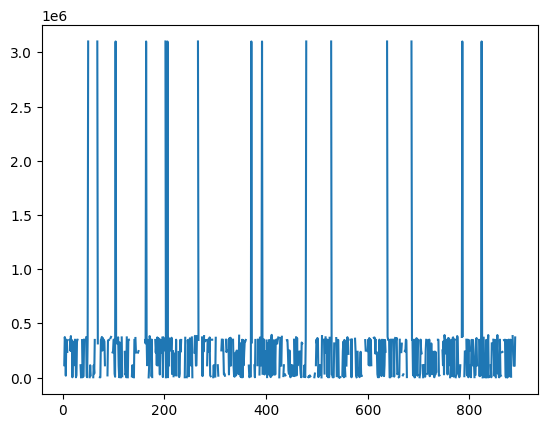

In [26]:
titanic_df['Ticket_numeric_1'].plot(kind='line')

In [27]:
titanic_df['ticket_numeric >=300000'] = titanic_df['Ticket_numeric_1'].where(titanic_df['Ticket_numeric_1']>=300000)
titanic_df['ticket_numeric < 300000'] = titanic_df['Ticket_numeric_1'].where(titanic_df['Ticket_numeric_1']<300000)
titanic_df=titanic_df.drop('Ticket_numeric_1',axis=1)
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Ticket_2_str,ticket_numeric >=300000,ticket_numeric < 300000
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,A/5 21171,NaN,NaN
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,PC 17599,NaN,NaN
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,STON/O2. 3101282,NaN,NaN
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,NaN,NaN,113803.0
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,NaN,373450.0,NaN


In [28]:
titanic_df['Ticket_2_str'].value_counts().values

array([7, 6, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
titanic_df['Ticket_str_new_1'] = titanic_df['Ticket_2_str'].where(titanic_df['Ticket_2_str'].map(titanic_df['Ticket_2_str'].value_counts())==1)
titanic_df['Ticket_str_new_2'] = titanic_df['Ticket_2_str'].where(titanic_df['Ticket_2_str'].map(titanic_df['Ticket_2_str'].value_counts())==2)
titanic_df['Ticket_str_new_3'] = titanic_df['Ticket_2_str'].where(titanic_df['Ticket_2_str'].map(titanic_df['Ticket_2_str'].value_counts())>2)

In [30]:
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Ticket_2_str,ticket_numeric >=300000,ticket_numeric < 300000,Ticket_str_new_1,Ticket_str_new_2,Ticket_str_new_3
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,A/5 21171,NaN,NaN,A/5 21171,NaN,NaN
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,PC 17599,NaN,NaN,PC 17599,NaN,NaN
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,STON/O2. 3101282,NaN,NaN,STON/O2. 3101282,NaN,NaN
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,NaN,NaN,113803.0,NaN,NaN,NaN
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,NaN,373450.0,NaN,NaN,NaN,NaN


In [31]:
titanic_df = titanic_df.drop('Ticket_2_str',axis=1)
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,ticket_numeric >=300000,ticket_numeric < 300000,Ticket_str_new_1,Ticket_str_new_2,Ticket_str_new_3
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,NaN,NaN,A/5 21171,NaN,NaN
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,NaN,NaN,PC 17599,NaN,NaN
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,NaN,NaN,STON/O2. 3101282,NaN,NaN
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,NaN,113803.0,NaN,NaN,NaN
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,373450.0,NaN,NaN,NaN,NaN


In [32]:
titanic_df['ticket_numeric >=300000']= titanic_df['ticket_numeric >=300000'].replace(titanic_df['ticket_numeric >=300000'].value_counts().index,1)
titanic_df['ticket_numeric < 300000']= titanic_df['ticket_numeric < 300000'].replace(titanic_df['ticket_numeric < 300000'].value_counts().index,1)
titanic_df['Ticket_str_new_1']= titanic_df['Ticket_str_new_1'].replace(titanic_df['Ticket_str_new_1'].value_counts().index,1)
titanic_df['Ticket_str_new_2']= titanic_df['Ticket_str_new_2'].replace(titanic_df['Ticket_str_new_2'].value_counts().index,1)
titanic_df['Ticket_str_new_3']= titanic_df['Ticket_str_new_3'].replace(titanic_df['Ticket_str_new_3'].value_counts().index,1)
titanic_df.head()

C:\Users\IZU\AppData\Local\Temp\ipykernel_36092\4103359039.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df['Ticket_str_new_1']= titanic_df['Ticket_str_new_1'].replace(titanic_df['Ticket_str_new_1'].value_counts().index,1)
C:\Users\IZU\AppData\Local\Temp\ipykernel_36092\4103359039.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_df['Ticket_str_new_2']= titanic_df['Ticket_str_new_2'].replace(titanic_df['Ticket_str_new_2'].value_counts().index,1)
C:\Users\IZU\AppData\Local\Temp\ipykernel_36092\4103359039.py:

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,ticket_numeric >=300000,ticket_numeric < 300000,Ticket_str_new_1,Ticket_str_new_2,Ticket_str_new_3
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,NaN,NaN,1.0,NaN,NaN
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,NaN,NaN,1.0,NaN,NaN
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,NaN,NaN,1.0,NaN,NaN
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,1.0,NaN,NaN,NaN,NaN


In [33]:
titanic_df = titanic_df.fillna(0)
titanic_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,ticket_numeric >=300000,ticket_numeric < 300000,Ticket_str_new_1,Ticket_str_new_2,Ticket_str_new_3
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [34]:
sns_df = pd.concat([titanic_df,Y],axis=1)
sns_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,ticket_numeric >=300000,ticket_numeric < 300000,Ticket_str_new_1,Ticket_str_new_2,Ticket_str_new_3,Survived
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
887,1,0,19.0,0,0,30.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
888,3,0,28.0,1,2,23.4500,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
889,1,1,26.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


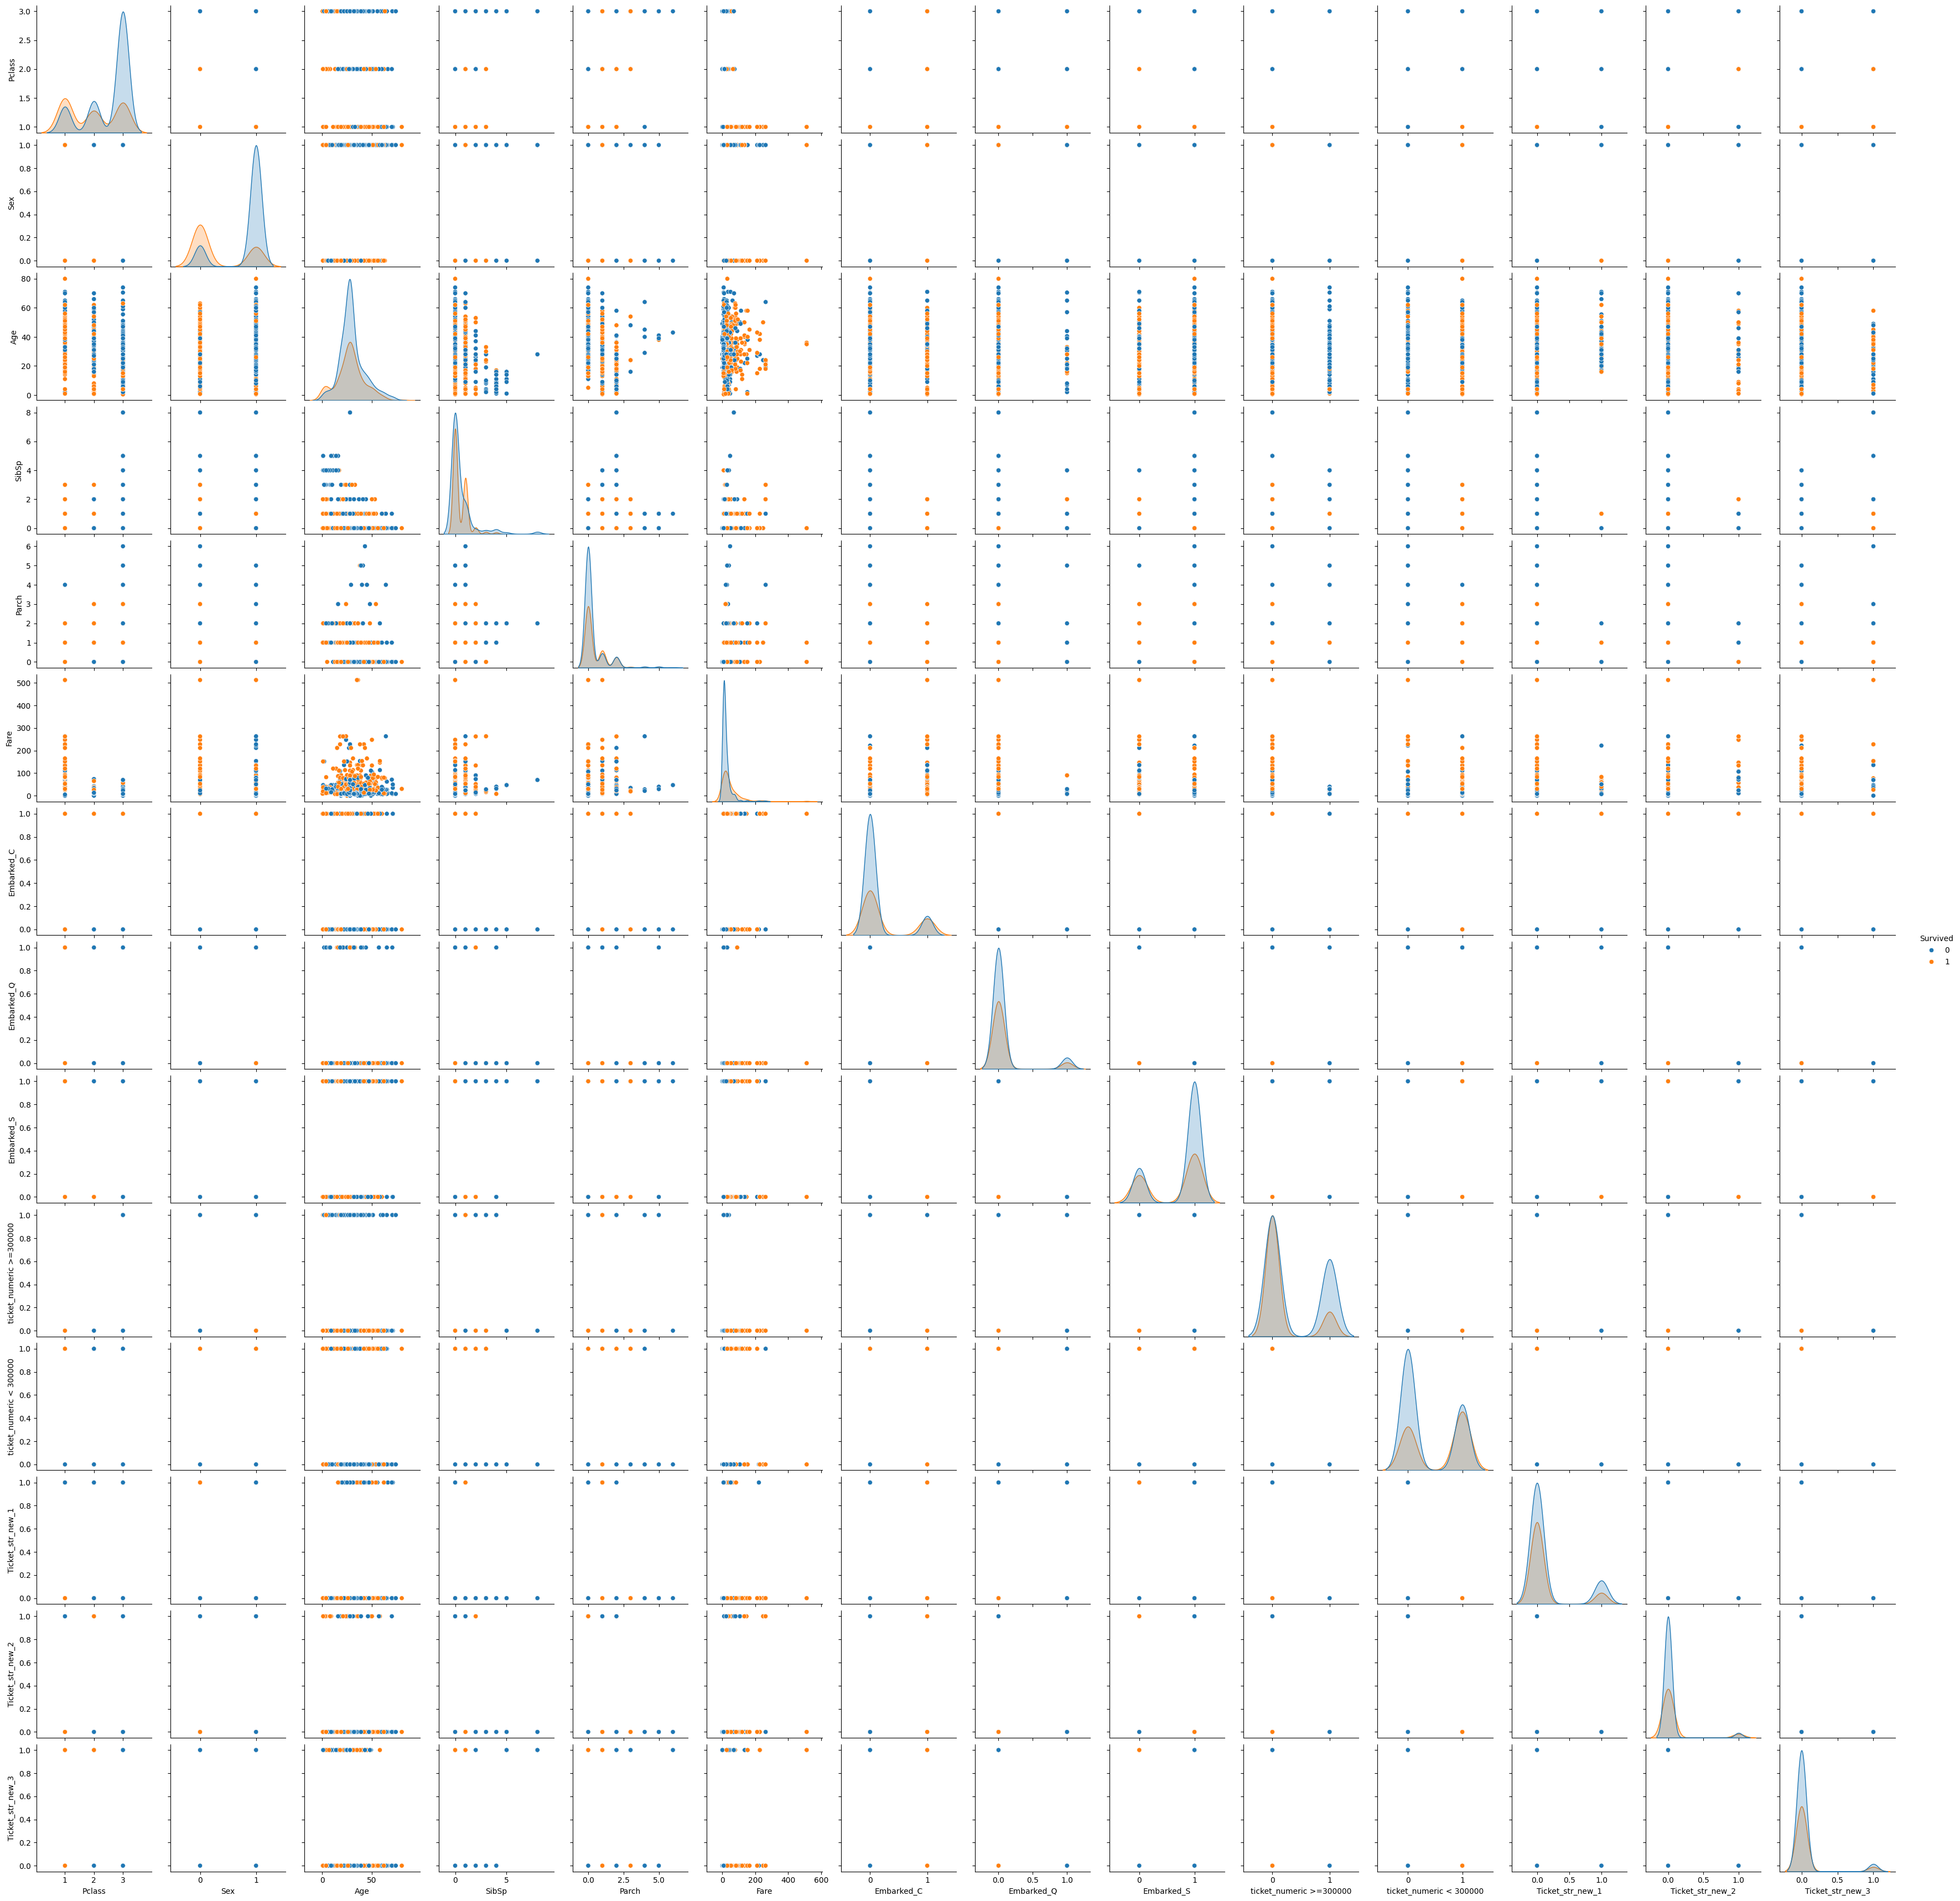

In [35]:
sns.pairplot(sns_df,hue='Survived')

In [36]:
##One Hot encoding for the column "Pclass" / passenger class

encoder2 = OneHotEncoder()
encoded = encoder2.fit_transform(titanic_df[['Pclass']]).toarray()
encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [37]:
Pclass_df = pd.DataFrame(encoded,columns=encoder2.get_feature_names_out())
Pclass_df

,Pclass_1,Pclass_2,Pclass_3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,1.0,0.0
887,1.0,0.0,0.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0


In [38]:
titanic_df = pd.concat([titanic_df,Pclass_df],axis=1)
titanic_df = titanic_df.drop('Pclass',axis=1)
titanic_df.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,ticket_numeric >=300000,ticket_numeric < 300000,Ticket_str_new_1,Ticket_str_new_2,Ticket_str_new_3,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,35.0,0,0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [39]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Sex                      891 non-null    int64  
 1   Age                      891 non-null    float64
 2   SibSp                    891 non-null    int64  
 3   Parch                    891 non-null    int64  
 4   Fare                     891 non-null    float64
 5   Embarked_C               891 non-null    float64
 6   Embarked_Q               891 non-null    float64
 7   Embarked_S               891 non-null    float64
 8   ticket_numeric >=300000  891 non-null    float64
 9   ticket_numeric < 300000  891 non-null    float64
 10  Ticket_str_new_1         891 non-null    float64
 11  Ticket_str_new_2         891 non-null    float64
 12  Ticket_str_new_3         891 non-null    float64
 13  Pclass_1                 891 non-null    float64
 14  Pclass_2                 8

In [40]:
corr = titanic_df.corr()
corr

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,ticket_numeric >=300000,ticket_numeric < 300000,Ticket_str_new_1,Ticket_str_new_2,Ticket_str_new_3,Pclass_1,Pclass_2,Pclass_3
Sex,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.082853,-0.074115,0.119224,0.075789,-0.099056,0.111898,-0.050847,-0.058778,-0.098013,-0.064746,0.137143
Age,0.081163,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729,-0.176399,0.137302,0.073176,-0.025194,-0.029831,0.323896,0.015831,-0.291955
SibSp,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,0.025964,-0.095374,-0.158634,0.050355,0.336126,-0.054582,-0.055932,0.092548
Parch,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.009700,-0.040562,-0.168150,0.072069,0.247527,-0.017633,-0.000734,0.015790
Fare,-0.182333,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,-0.265471,0.093706,-0.119059,0.180666,0.326199,0.591711,-0.118557,-0.413333
Embarked_C,-0.082853,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,-0.275926,0.154197,-0.004160,0.172809,0.057940,0.296423,-0.125416,-0.153329
Embarked_Q,-0.074115,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.307853,-0.133830,-0.115805,-0.071760,-0.078121,-0.155342,-0.127301,0.237449
Embarked_S,0.119224,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,0.047990,-0.050864,0.076520,-0.106229,-0.001596,-0.161921,0.189980,-0.015104
ticket_numeric >=300000,0.075789,-0.176399,0.025964,0.009700,-0.265471,-0.275926,0.307853,0.047990,1.000000,-0.583528,-0.273980,-0.154664,-0.168373,-0.374985,-0.338173,0.598313
ticket_numeric < 300000,-0.099056,0.137302,-0.095374,-0.040562,0.093706,0.154197,-0.133830,-0.050864,-0.583528,1.000000,-0.363833,-0.205387,-0.223592,0.304667,0.260885,-0.474826


<Axes: >

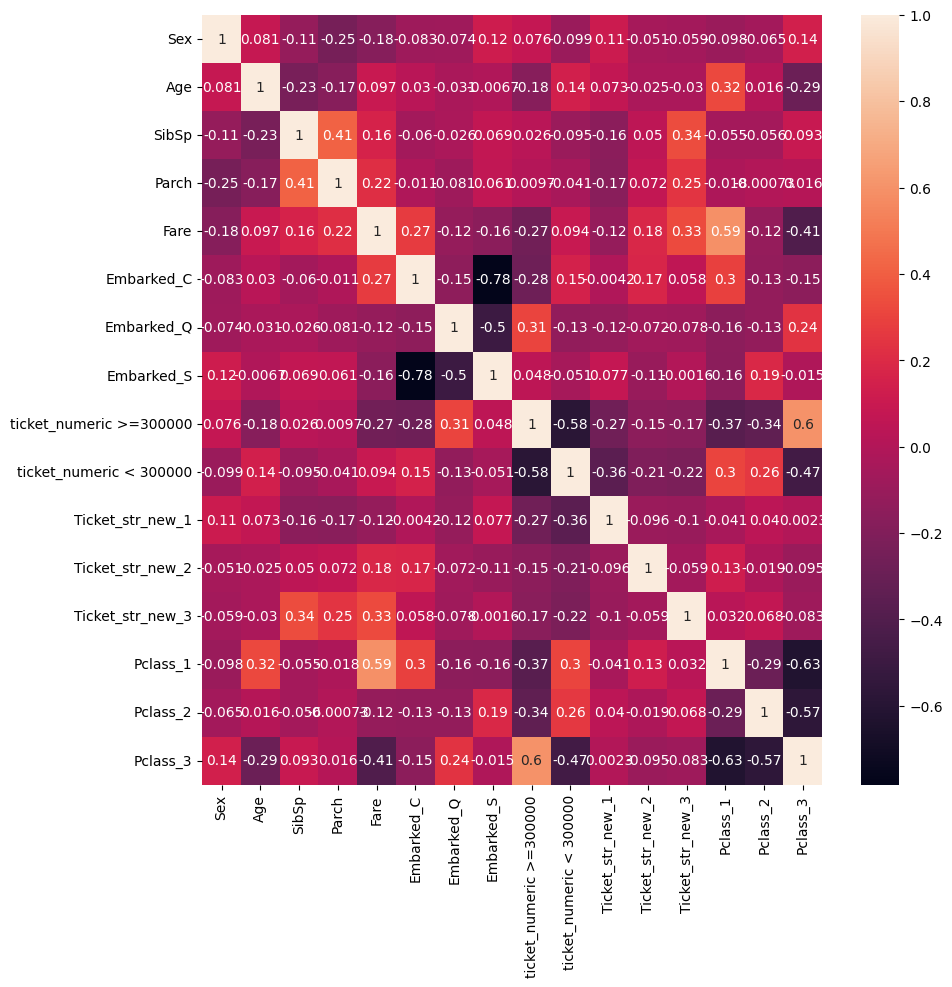

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [42]:
titanic_df_file = pd.concat([titanic_df,Y],axis=1)
titanic_df_file 

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,ticket_numeric >=300000,ticket_numeric < 300000,Ticket_str_new_1,Ticket_str_new_2,Ticket_str_new_3,Pclass_1,Pclass_2,Pclass_3,Survived
0,1,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,0,38.0,1,0,71.2833,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,0,26.0,0,0,7.9250,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,1,35.0,0,0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,27.0,0,0,13.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
887,0,19.0,0,0,30.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
888,0,28.0,1,2,23.4500,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
889,1,26.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1


In [44]:
#titanic_df_file.to_csv(r'preprocessed_data\train_preprocessed1.csv')